# Minimal Volume enclosing ellipsoid<br>
In this workbook an example is presented that calculates the minimal volume enclosing ellipsoid
for a given point cloud. The pointcloud should be provided as numpy array.
A detailed mathematical derivation of the applied algorithm can be found under <br>
http://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.116.7691&rep=rep1&type=pdf <br>

THis workbook uses the functions provided in mevv

First import necessary packages and activate auto-reload

In [130]:
%load_ext autoreload
%autoreload 2
import numpy as np
import matplotlib.pyplot as plt

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Import function that finds the minimal volume enclosing ellipsoid

In [131]:
import mevv

Create a random pointcloud in R^2

In [124]:
pcl = np.random.random((10, 2))

Calculate the Matrix M and the vector c such that <br>
(p-c)' M (p-c) = 1 <br>
if p is a point on the ellipsoid.<br>
Here (p-c)' denotes the transposed of (p-c)

In [125]:
M, c = mevv.ellipsoid(pcl, 0.001)

Generate a set of points, that lie on a circle.

In [ ]:
inputs = np.linspace(0, 1, 100)
x = np.cos(3 * np.pi * inputs)
y = np.sin(3 * np.pi * inputs)
circle = np.dstack((x, y))

Use ```mevv.inverse_sqrt_matrix ```
to calculate the matrix that maps the unit circle to the desired ellipse

In [ ]:
ellipse_generator = mevv.inverse_sqrt_matrix(M)
ellipse = ellipse_generator * circle.T

Finally the point cloud and the enclosing ellipse can be plotted

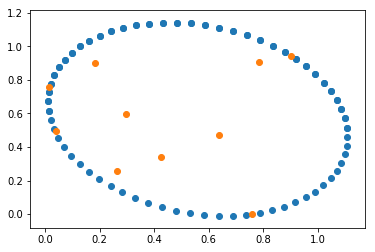

In [126]:
plt.scatter(np.asarray(ellipse[0, :]).squeeze() + c[0, 0], np.asarray(ellipse[1, :]).squeeze() + c[1, 0])
plt.scatter(pcl[:, 0], pcl[:, 1])